In [68]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
import seaborn as sns
import statsmodels.api as sm
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix 



url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=";")
df = df.dropna()
df['quality'] = df['quality'].apply(lambda x: 1 if x >= 5 else 0)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1


Number of Columns: 12


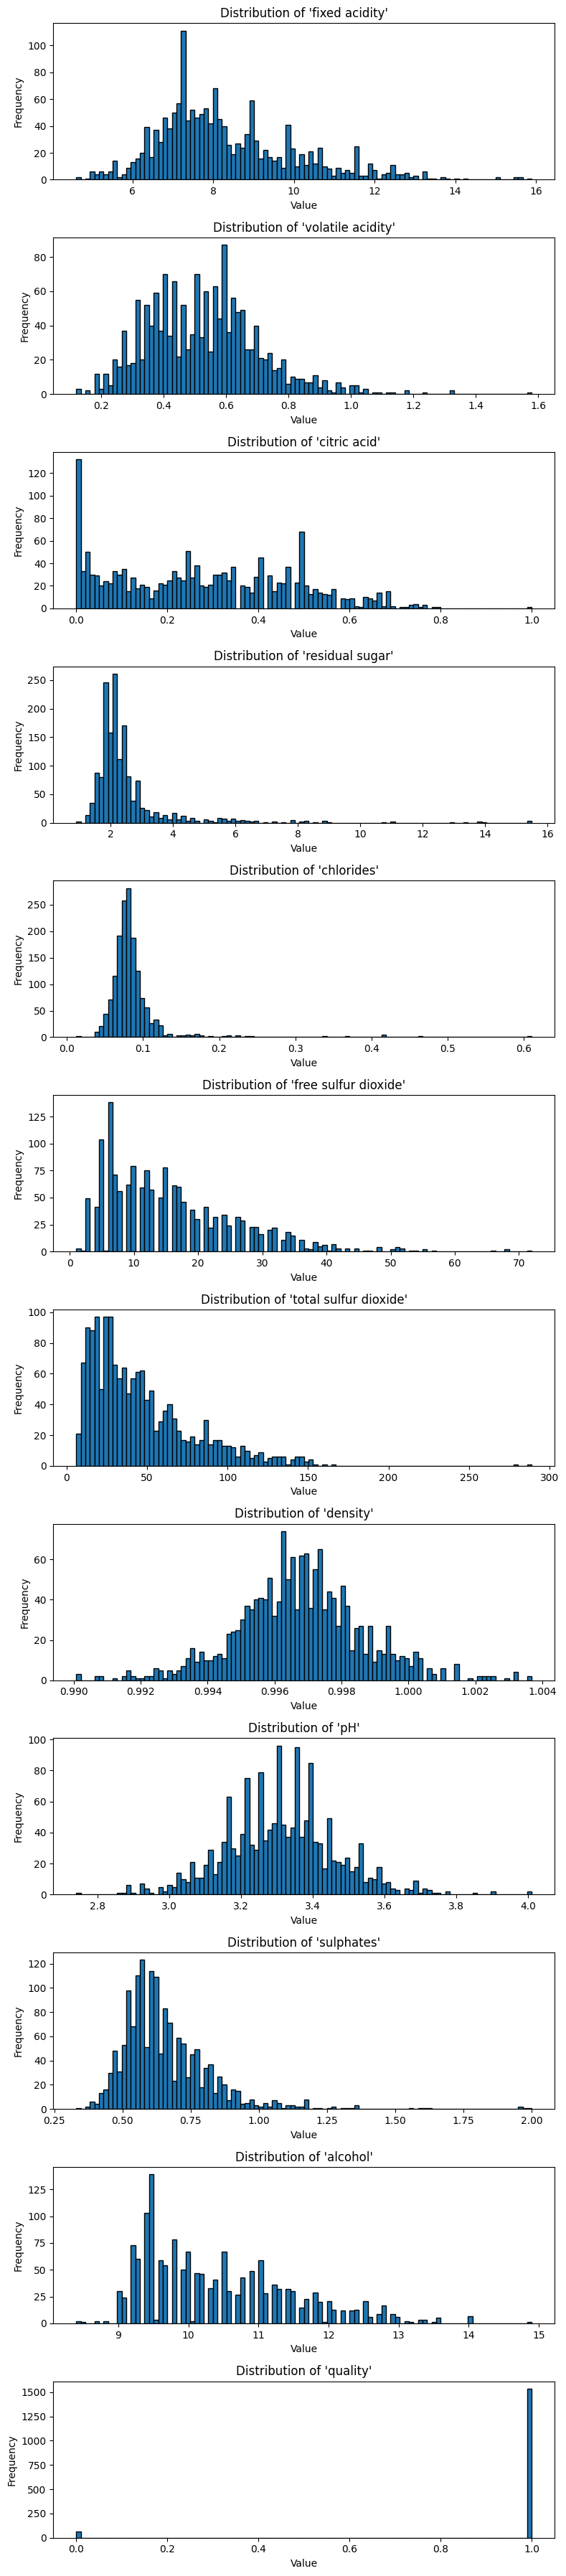

In [69]:
num_columns = len(df.columns)
print(f"Number of Columns: {num_columns}")

# **Create a figure with multiple subplots**
fig, axs = plt.subplots(nrows=num_columns, ncols=1, figsize=(8, 3*num_columns))

# **Loop through each column and plot its distribution**
for i, col in enumerate(df.columns):
    axs[i].hist(df[col], bins=100, edgecolor='black')
    axs[i].set_title(f"Distribution of '{col}'")
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Frequency')

# **Layout so plots do not overlap**
fig.tight_layout()

# **Display the plot**
plt.show()

In [70]:
test_gre = pd.cut(x = df['residual sugar'],
                  bins = [0, 1.9, 2.2, 2.6, 15.5],
                  labels = ['bad', 'average', 'average +', 'good'])

pd.crosstab(df['quality'], test_gre)
print(test_gre.head())


0          bad
1    average +
2    average +
3          bad
4          bad
Name: residual sugar, dtype: category
Categories (4, object): ['bad' < 'average' < 'average +' < 'good']


In [71]:
df = df.merge(test_gre, left_index=True, right_index=True)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar_x,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,residual sugar_y
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1,average +
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1,average +
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1,bad
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1,bad


In [72]:
X = pd.get_dummies(df, columns=['residual sugar_y'])
target = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2)


# 2. Classification with Logistic Regression 

In [73]:
clf = linear_model.LogisticRegression(C=1.0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
cm = pd.crosstab(y_test, y_pred, rownames=['Real Class'], colnames=['Predicted Class'])
cm

/Users/notagain/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Predicted Class,0,1
Real Class,,
0,18,0
1,0,302


In [75]:
clf.score(X_test, y_test)


1.0

In [76]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00       302

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320



In [80]:
probs = clf.predict_proba(X_test)

y_preds = np.where(probs[:,1]>0.1,1,0)

cm = pd.crosstab(y_test, y_preds, rownames=['Real Class'], colnames=['Predicted Class'])
cm

Predicted Class,0,1
Real Class,,
0,3,15
1,0,302


It is obvious that the lower the classification threshold, the more the number of individuals classified as 1 increases, hence the sensitivity will increase. Conversely, an individual is classified as 0 only if the probability of belonging to this class is higher than 0.6, which increases the precision of the null class but decreases specificity.

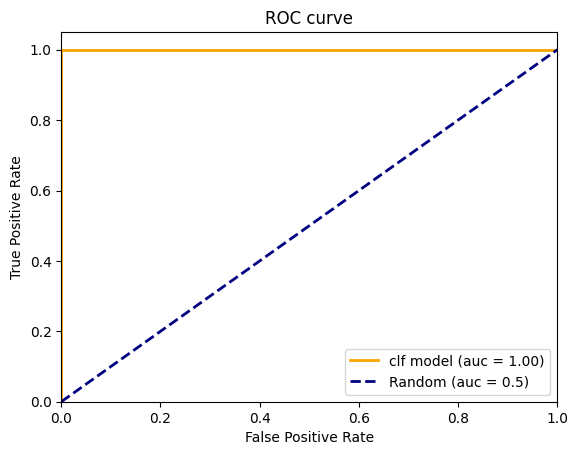

In [83]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, seuils = roc_curve(y_test, probs[:,1], pos_label=1)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='orange', lw=2, label='clf model (auc = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random (auc = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

The model completly overfits the data.

In [91]:
from sklearn import svm


clf = svm.SVC(gamma=0.01,  kernel='poly')       
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
cm = pd.crosstab(y_test, y_pred, rownames=['Real Class'], colnames=['Predicted Class'])
cm
clf.score(X_test, y_test)



1.0

In [92]:
pd.crosstab(y_test, y_pred, rownames=['Real Class'], colnames=['Predicted Class'])


Predicted Class,0,1
Real Class,,
0,18,0
1,0,302


In [95]:
from sklearn import model_selection

parameters = {'C':[0.1,1,10], 'kernel':['rbf','linear', 'poly'], 'gamma':[0.001, 0.1, 0.5]}
grid_clf = model_selection.GridSearchCV(estimator=clf, param_grid=parameters)
grille = grid_clf.fit(X_train,y_train)
print(pd.DataFrame.from_dict(grille.cv_results_).loc[:,['params', 'mean_test_score']]) 


                                            params  mean_test_score
0      {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}         0.964816
1   {'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}         1.000000
2     {'C': 0.1, 'gamma': 0.001, 'kernel': 'poly'}         0.964816
3        {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}         0.964816
4     {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}         1.000000
5       {'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}         0.998437
6        {'C': 0.1, 'gamma': 0.5, 'kernel': 'rbf'}         0.964816
7     {'C': 0.1, 'gamma': 0.5, 'kernel': 'linear'}         1.000000
8       {'C': 0.1, 'gamma': 0.5, 'kernel': 'poly'}         0.998437
9        {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}         0.964816
10    {'C': 1, 'gamma': 0.001, 'kernel': 'linear'}         1.000000
11      {'C': 1, 'gamma': 0.001, 'kernel': 'poly'}         0.967941
12         {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}         0.964816
13      {'C': 1, 'gamma': 0.1, 'kernel': 'linear

In [96]:
print(grid_clf.best_params_)


{'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}


In [97]:
y_pred = grid_clf.predict(X_test)
pd.crosstab(y_test, y_pred, rownames=['Real Class'], colnames=['Predicted Class'])

Predicted Class,0,1
Real Class,,
0,18,0
1,0,302


In [84]:
norm_df = pd.DataFrame(preprocessing.StandardScaler().fit_transform(df), 
                      columns=df.columns)

# Now you can use DataFrame methods like head() and columns
norm_df.head()

ValueError: could not convert string to float: 'bad'

Number of Columns: 12


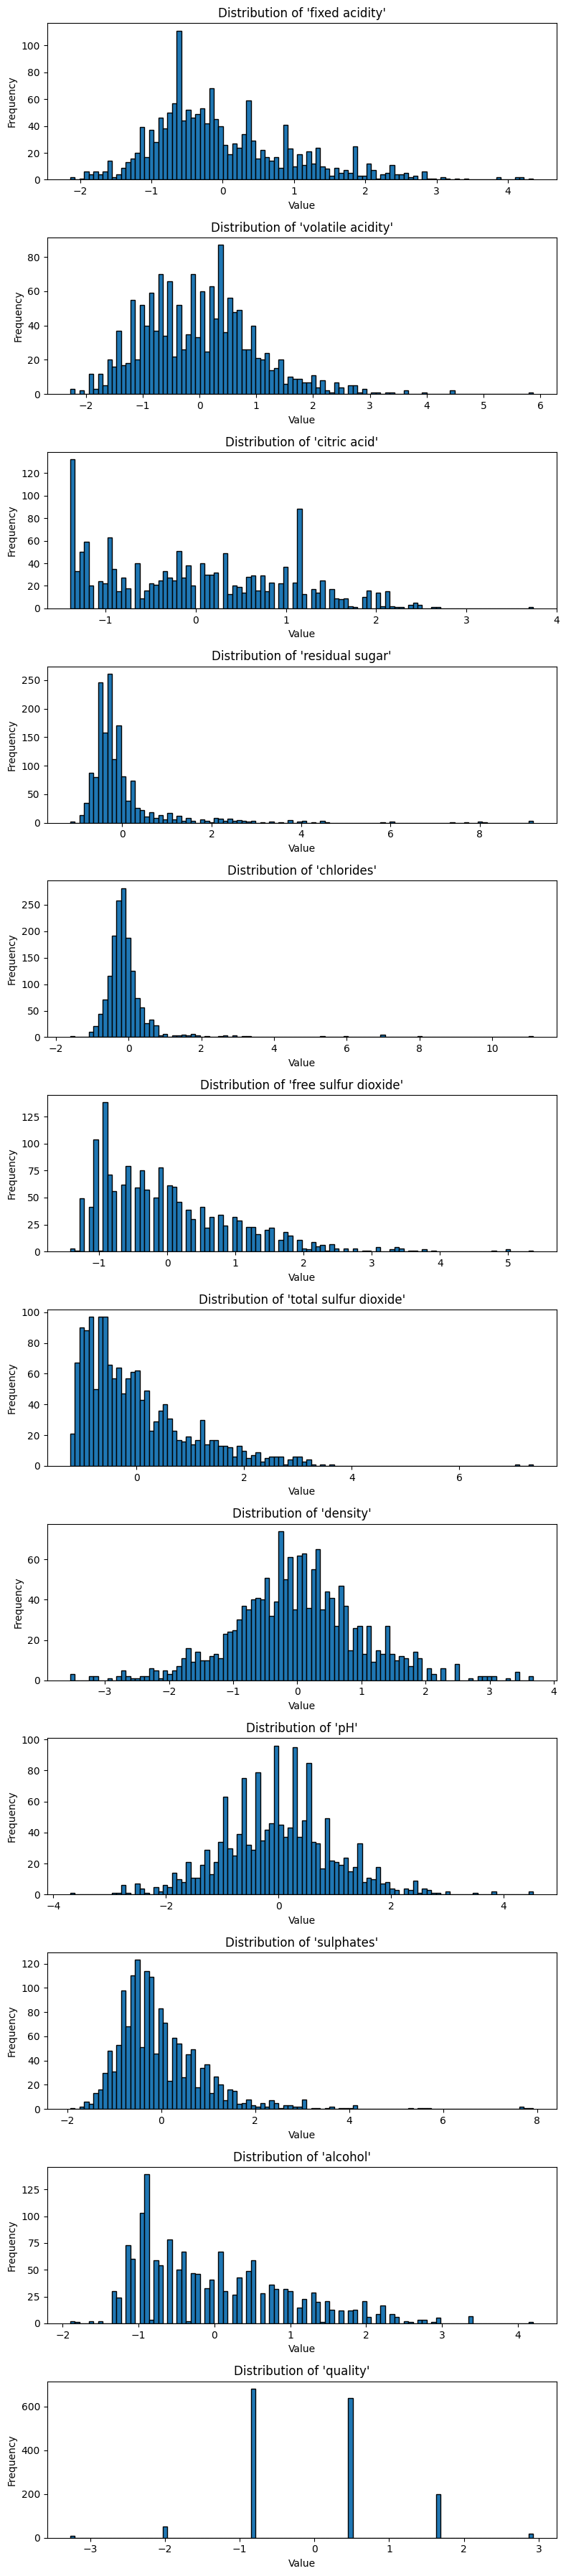

In [85]:
num_columns = len(norm_df.columns)
print(f"Number of Columns: {num_columns}")

# **Create a figure with multiple subplots**
fig, axs = plt.subplots(nrows=num_columns, ncols=1, figsize=(8, 3*num_columns))

# **Loop through each column and plot its distribution**
for i, col in enumerate(norm_df.columns):
    axs[i].hist(norm_df[col], bins=100, edgecolor='black')
    axs[i].set_title(f"Distribution of '{col}'")
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Frequency')

# **Layout so plots do not overlap**
fig.tight_layout()

# **Display the plot**
plt.show()

In [20]:
skewness_values = df.skew()

# **Define a Threshold for Skewness (e.g., absolute value > 0.5)**
skewness_threshold = 0.5

# **Get List of Columns with Skewness above the Threshold**
skewed_columns = skewness_values[abs(skewness_values) > skewness_threshold].index.tolist()

# **Print Skewness Values and Skewed Columns**
print("Skewness Values:")
print(skewness_values)
print("\nColumns with Skewness above Threshold ({}):".format(skewness_threshold))
print(skewed_columns)

# **Optional: Print Interpretation for Each Skewed Column**
for column in skewed_columns:
    skewness_value = skewness_values[column]
    if skewness_value > 0:
        print(f"{column} is positively skewed (right-skewed) with a skewness of {skewness_value:.2f}")
    else:
        print(f"{column} is negatively skewed (left-skewed) with a skewness of {skewness_value:.2f}")
		

Skewness Values:
fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

Columns with Skewness above Threshold (0.5):
['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates', 'alcohol']
fixed acidity is positively skewed (right-skewed) with a skewness of 0.98
volatile acidity is positively skewed (right-skewed) with a skewness of 0.67
residual sugar is positively skewed (right-skewed) with a skewness of 4.54
chlorides is positively skewed (right-skewed) with a skewness of 5.68
free sulfur dioxide is positively skewed (right-skewed) with a skewness of 1.25
total sulf

In [21]:
df[skewed_columns]

,fixed acidity,volatile acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol
0,7.4,0.700,1.9,0.076,11.0,34.0,0.56,9.4
1,7.8,0.880,2.6,0.098,25.0,67.0,0.68,9.8
2,7.8,0.760,2.3,0.092,15.0,54.0,0.65,9.8
3,11.2,0.280,1.9,0.075,17.0,60.0,0.58,9.8
4,7.4,0.700,1.9,0.076,11.0,34.0,0.56,9.4
...,...,...,...,...,...,...,...,...
1594,6.2,0.600,2.0,0.090,32.0,44.0,0.58,10.5
1595,5.9,0.550,2.2,0.062,39.0,51.0,0.76,11.2
1596,6.3,0.510,2.3,0.076,29.0,40.0,0.75,11.0
1597,5.9,0.645,2.0,0.075,32.0,44.0,0.71,10.2


In [87]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar_x,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,residual sugar_y
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1,average +
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1,average +
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1,bad
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1,bad


In [90]:
# Use residual sugar_x instead of residual sugar_y since it contains the numeric values
test_gre = pd.cut(x = df['residual sugar_x'],
                  bins = [0, 1.9, 2.2, 2.6, 15.5],
                  labels = ['bad', 'average', 'average +', 'good'])
df = df.merge(test_gre, left_index=True, right_index=True)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar_x_x,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,residual sugar_y,residual sugar_x_y
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1,bad,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1,average +,average +
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1,average +,average +
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1,bad,bad
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1,bad,bad
